##  Questions to answer
1. Does the 'display' have more impact on demand that 'Feature'?'
2. Does the number of unique manufacturers for a category and subcategory impact the demand?
3. One hypthesis that should be tested.

## Loading required libraries

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Reading the data

In [2]:
train = pd.read_csv('train.csv')
product_data = pd.read_csv('product_data.csv')
store_data = pd.read_csv('store_data.csv')

In [3]:
train.shape, product_data.shape, store_data.shape

((232287, 8), (30, 6), (76, 9))

## Data Exploration

In [4]:
train.head()

,WEEK_END_DATE,STORE_NUM,UPC,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS
0,14-Jan-09,367,1111009477,1.39,1.57,0,0,13
1,14-Jan-09,367,1111009497,1.39,1.39,0,0,20
2,14-Jan-09,367,1111085319,1.88,1.88,0,0,14
3,14-Jan-09,367,1111085345,1.88,1.88,0,0,29
4,14-Jan-09,367,1111085350,1.98,1.98,0,0,35


### Let us check what impact do product featuring and display have on demand.

In [5]:
train['FEATURE'].corr(train['UNITS'])

0.29921736227866974

In [6]:
train['DISPLAY'].corr(train['UNITS'])

0.3230685587888031

As we can see, display has higher correlation than feature which implies that it has higher impact on demand.

<AxesSubplot:>

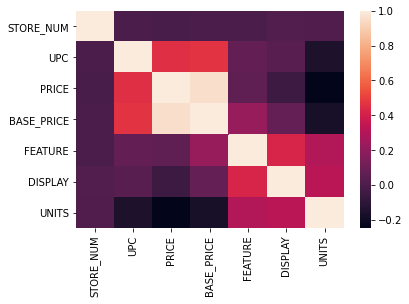

In [7]:
corr=train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

As correlation of both 'feature' and 'display' are very close with respect to 'units', we can't really make out from the correlation matrix but we saw above the numerical values to prove.

In [13]:
product_data.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML
4,1111038080,PL ANTSPTC SPG MNT MTHWS,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML


In [48]:
store_data.head()

,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707
1,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408.0,46073,24767
2,613,EAST ALLEN,ALLEN,TX,19100,MAINSTREAM,464.0,64926,29386
3,623,HOUSTON,HOUSTON,TX,26420,MAINSTREAM,NaN,46930,36741
4,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54053


### Let us see if the number of unique manufacturers for a category and subcategory impacts the demand.

In [14]:
store_product_data = train.merge(product_data, how = 'left', on='UPC')

In [15]:
store_product_data.shape

(232287, 13)

In [16]:
store_product_data.head()

,WEEK_END_DATE,STORE_NUM,UPC,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,14-Jan-09,367,1111009477,1.39,1.57,0,0,13,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,14-Jan-09,367,1111009497,1.39,1.39,0,0,20,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,14-Jan-09,367,1111085319,1.88,1.88,0,0,14,PL HONEY NUT TOASTD OATS,PRIVATE LABEL,COLD CEREAL,ALL FAMILY CEREAL,12.25 OZ
3,14-Jan-09,367,1111085345,1.88,1.88,0,0,29,PL RAISIN BRAN,PRIVATE LABEL,COLD CEREAL,ADULT CEREAL,20 OZ
4,14-Jan-09,367,1111085350,1.98,1.98,0,0,35,PL BT SZ FRSTD SHRD WHT,PRIVATE LABEL,COLD CEREAL,ALL FAMILY CEREAL,18 OZ


In [23]:
store_product_data[['CATEGORY','MANUFACTURER']].drop_duplicates().sort_values(by = 'CATEGORY')

,CATEGORY,MANUFACTURER
0,BAG SNACKS,PRIVATE LABEL
30,BAG SNACKS,FRITO LAY
38,BAG SNACKS,SNYDER S
2,COLD CEREAL,PRIVATE LABEL
8,COLD CEREAL,GENERAL MI
11,COLD CEREAL,KELLOGG
5,FROZEN PIZZA,PRIVATE LABEL
14,FROZEN PIZZA,TOMBSTONE
63,FROZEN PIZZA,TONYS
19,ORAL HYGIENE PRODUCTS,PRIVATE LABEL


We see that there are **3 unique manufacturers** for **each category**

<AxesSubplot:xlabel='CATEGORY', ylabel='UNITS'>

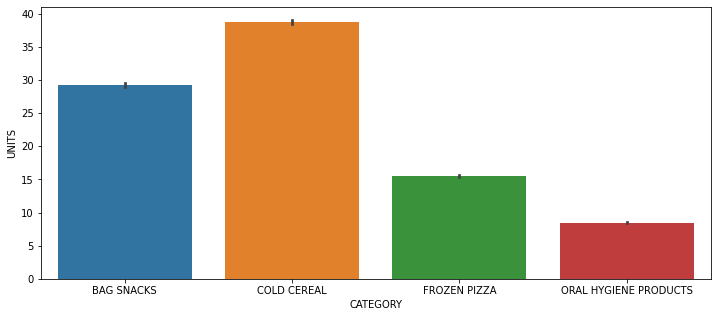

In [42]:
plt.figure(figsize=(12,5))
sns.barplot(data=store_product_data,y='UNITS',x='CATEGORY')

We have 3 unique manufacturers for each of the categories but it doesn't seem to have an impact on the demand of products.

In [24]:
store_product_data[['SUB_CATEGORY','MANUFACTURER']].drop_duplicates().sort_values(by = 'SUB_CATEGORY')

,SUB_CATEGORY,MANUFACTURER
3,ADULT CEREAL,PRIVATE LABEL
2,ALL FAMILY CEREAL,PRIVATE LABEL
8,ALL FAMILY CEREAL,GENERAL MI
11,ALL FAMILY CEREAL,KELLOGG
12,KIDS CEREAL,KELLOGG
108,MOUTHWASH/RINSES AND SPRAYS,P & G
19,MOUTHWASHES (ANTISEPTIC),PRIVATE LABEL
40,MOUTHWASHES (ANTISEPTIC),WARNER
81,MOUTHWASHES (ANTISEPTIC),P & G
5,PIZZA/PREMIUM,PRIVATE LABEL


- We have a similar trend for subcategories also with a very few exceptions. <br>
- Adult Cereal, Kids Cereal and Mouthwash/Rinses and Sprays have only 1 manufacturer.

<AxesSubplot:xlabel='SUB_CATEGORY', ylabel='UNITS'>

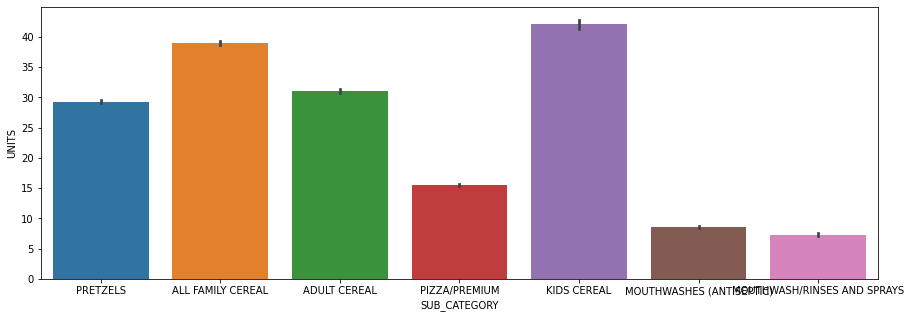

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(data=store_product_data,y='UNITS',x='SUB_CATEGORY')

Similarly, the number of unique manufacturers don't seem to have an impact on the demand.

### Testing Hypothesis

Average weekly baskets will vary with respect to the manufacturer.

In [46]:
merged_data = store_product_data.merge(store_data, how = 'left', left_on='STORE_NUM', right_on='STORE_ID')

In [47]:
merged_data.head()

,WEEK_END_DATE,STORE_NUM,UPC,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS,DESCRIPTION,MANUFACTURER,...,PRODUCT_SIZE,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,14-Jan-09,367,1111009477,1.39,1.57,0,0,13,PL MINI TWIST PRETZELS,PRIVATE LABEL,...,15 OZ,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707
1,14-Jan-09,367,1111009497,1.39,1.39,0,0,20,PL PRETZEL STICKS,PRIVATE LABEL,...,15 OZ,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707
2,14-Jan-09,367,1111085319,1.88,1.88,0,0,14,PL HONEY NUT TOASTD OATS,PRIVATE LABEL,...,12.25 OZ,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707
3,14-Jan-09,367,1111085345,1.88,1.88,0,0,29,PL RAISIN BRAN,PRIVATE LABEL,...,20 OZ,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707
4,14-Jan-09,367,1111085350,1.98,1.98,0,0,35,PL BT SZ FRSTD SHRD WHT,PRIVATE LABEL,...,18 OZ,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707


<AxesSubplot:xlabel='MANUFACTURER', ylabel='UNITS'>

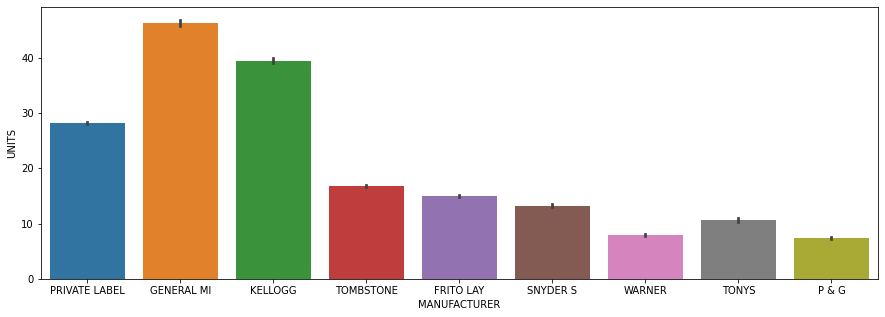

In [53]:
plt.figure(figsize=(15,5))
sns.lineplot(data=merged_data,y='UNITS',x='WEEK_END_DATE')

In [ ]:
weekly_demand = store_product_data.groupby(['WEEK_END_DATE'])['UNITS'].sum()

plt.figure(figsize=(30,10))
sns.lineplot(x = weekly_demand.index, y = weekly_demand)